In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [4]:
df = pd.read_excel('ENB2012_data.xlsx')

## Summary Statistics of the attributes

In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Renaming the attributes for better readability

In [6]:
df = df.rename(columns=
    {
        'X1': 'Relative Compactness',
        'X2': 'Surface Area',
        'X3': 'Wall Area',
        'X4': 'Roof Area',
        'X5': 'Overall Height',
        'X6': 'Orientation',
        'X7': 'Glazing Area',
        'X8': 'Glazing Area Distribution',
        'Y1': 'Heating Load'
    }
)

## Summary Statistics of the attributes

In [7]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Data Visualization

In [9]:
import seaborn as sns

### 1.) Box Plot

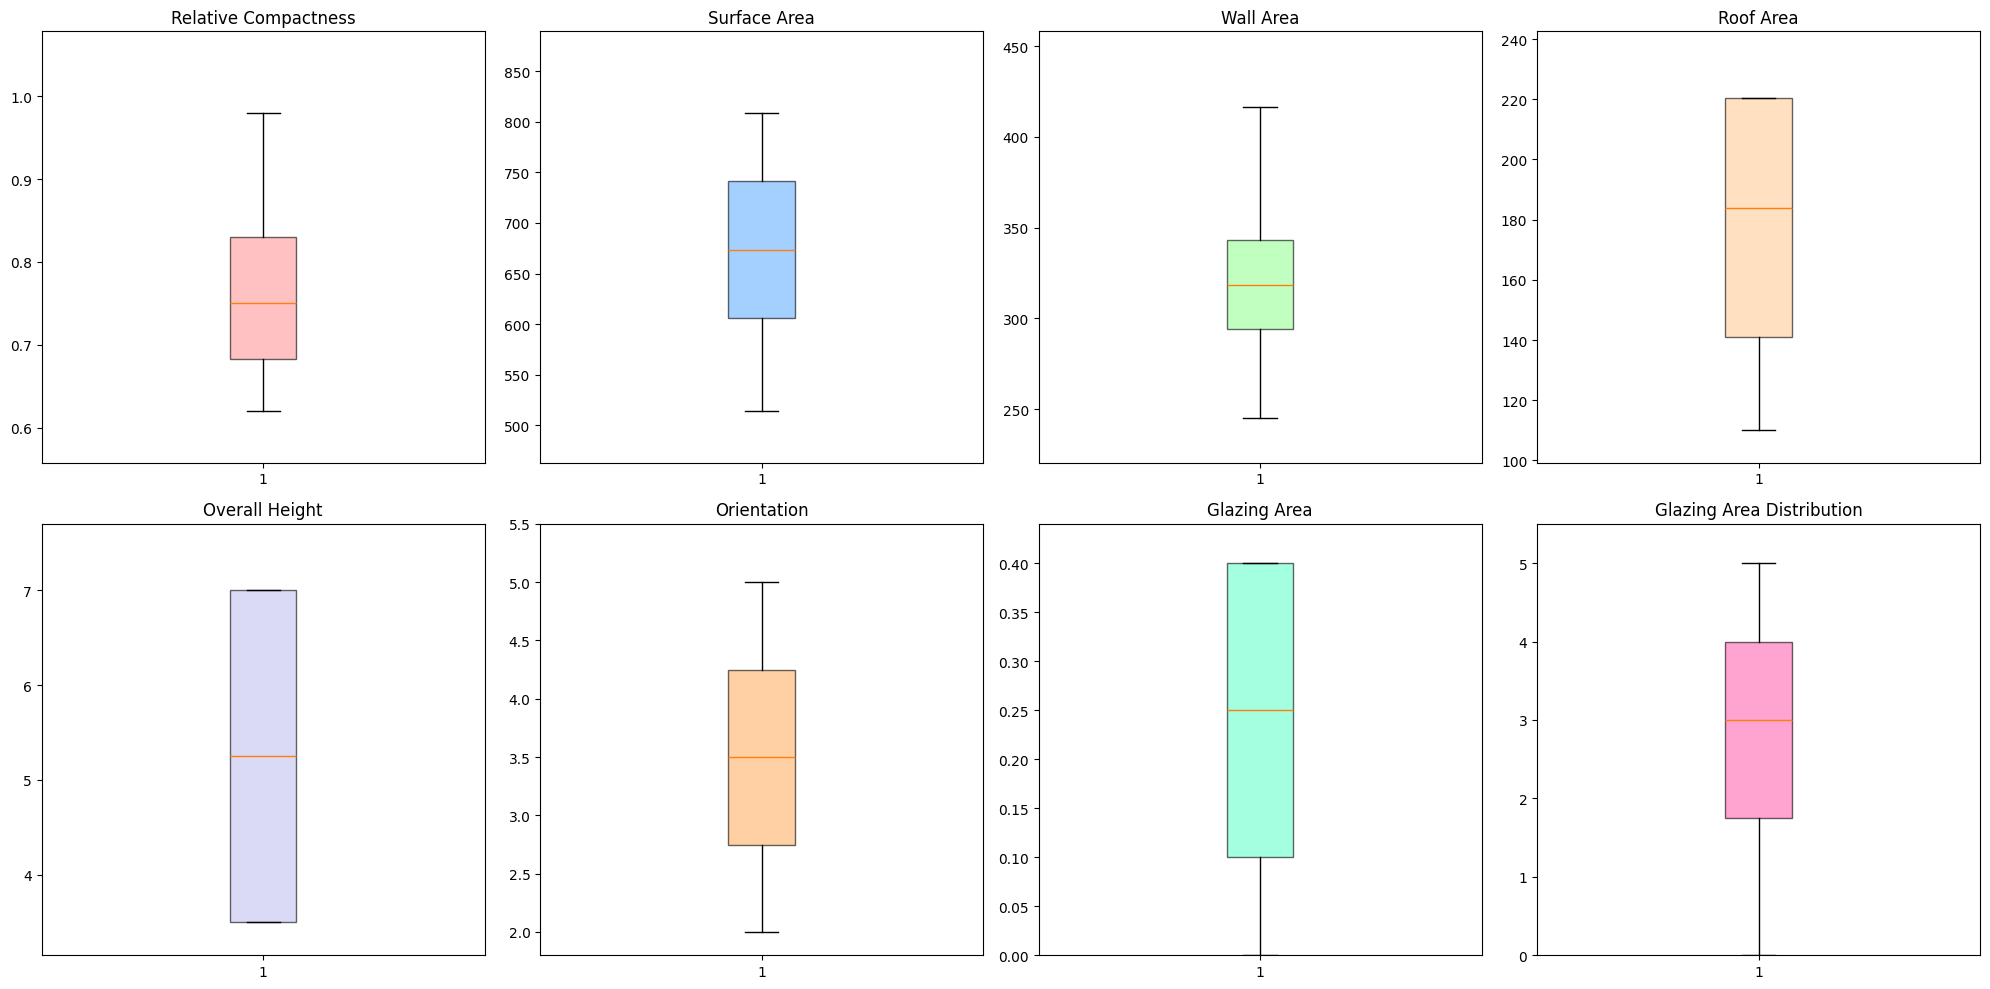

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=False)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB266', '#66FFCC', '#FF66B2']

col_index = 0
for i in range(2):
    for j in range(4):
        box = axs[i, j].boxplot(df.iloc[:, col_index], patch_artist=True)
        
        # Set color for the box
        for patch in box['boxes']:
            patch.set_facecolor(colors[col_index % len(colors)])
            patch.set_alpha(0.6)
        
    
        data_min = df.iloc[:, col_index].min()
        data_max = df.iloc[:, col_index].max()
        axs[i, j].set_ylim(data_min - abs(data_min)*0.1, data_max + abs(data_max)*0.1)
        
        axs[i, j].set_title(df.columns[col_index])
        col_index += 1

plt.tight_layout()
plt.show()

### 2.) Histogram's to see the frequency distribution

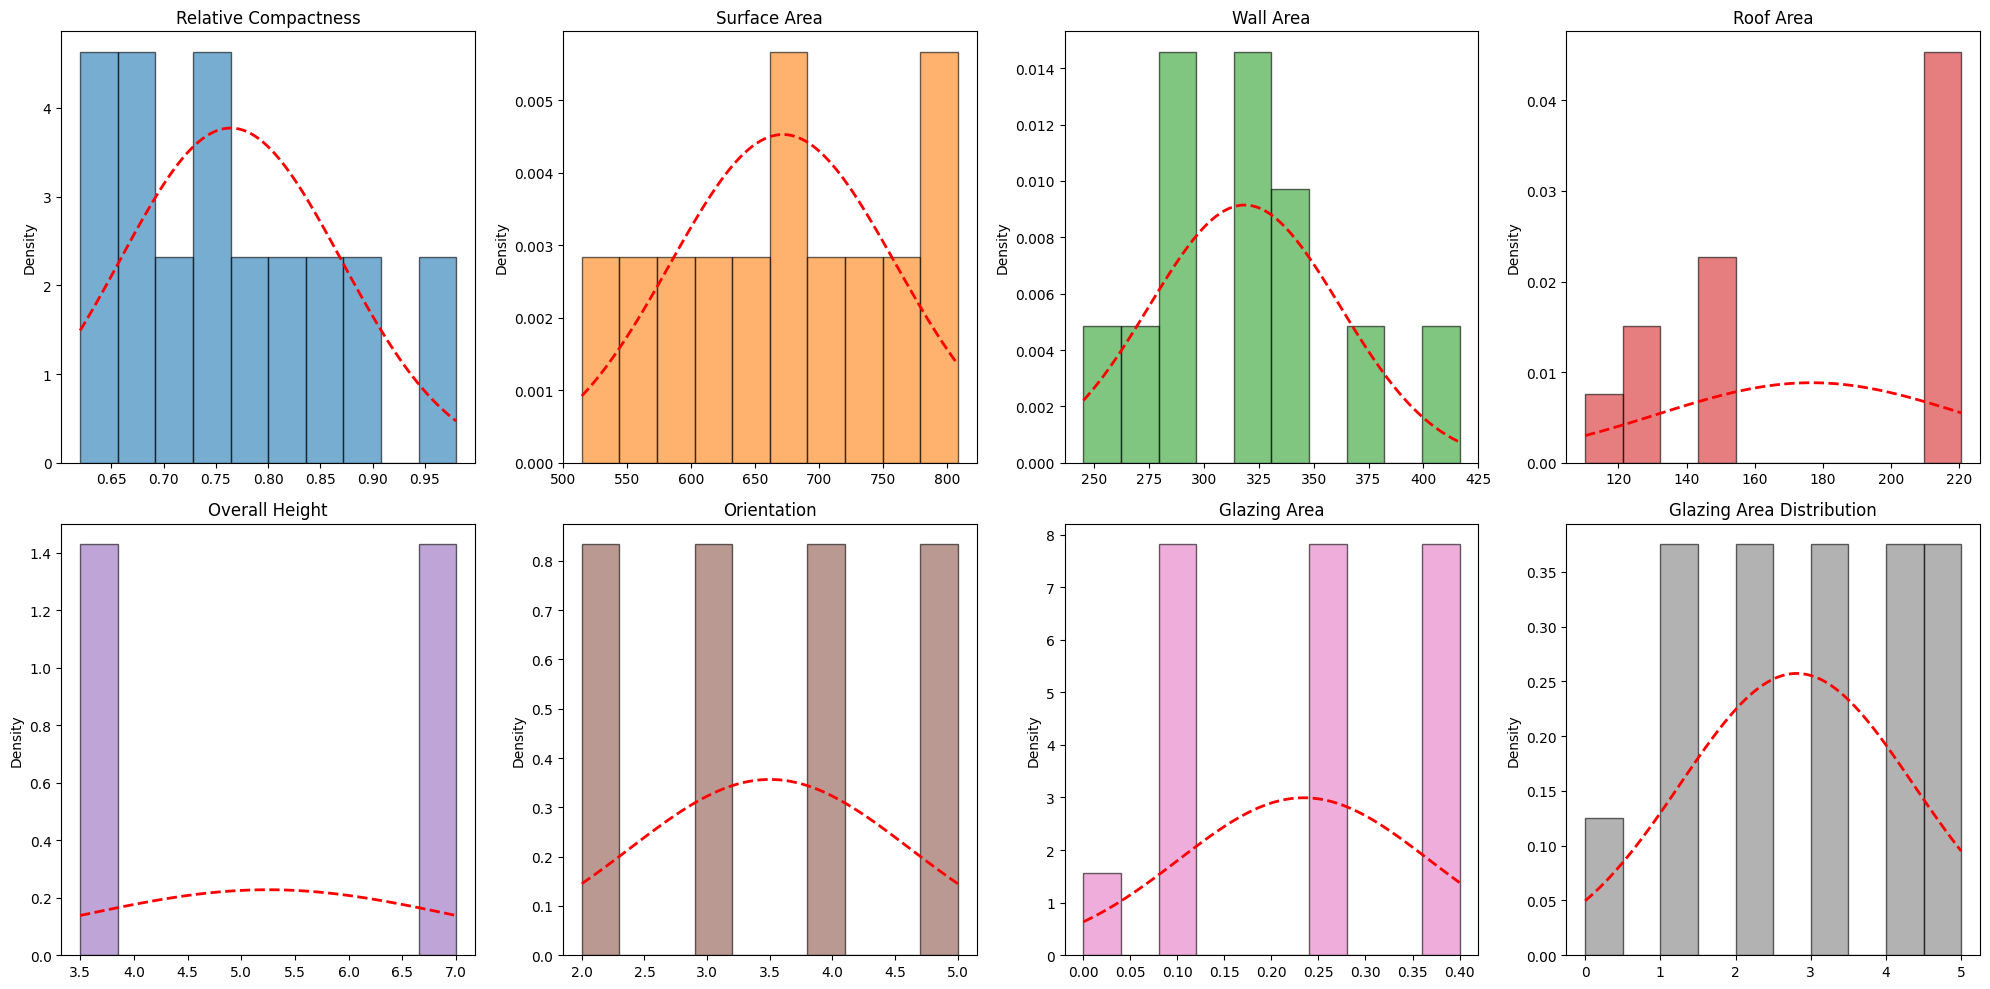

In [18]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=False)

col_index = 0
for i in range(2):
    for j in range(4):
        data = df.iloc[:, col_index]
        
        # Plot histogram
        counts, bins, patches = axs[i, j].hist(data, color=f"C{col_index}", bins=10, edgecolor='black', alpha=0.6, density=True)
        
        # Fit normal distribution
        mu, sigma = data.mean(), data.std()
        x = np.linspace(data.min(), data.max(), 100)
        axs[i, j].plot(x, norm.pdf(x, mu, sigma), 'r--', linewidth=2)  # Red dashed normal curve
        
        axs[i, j].set_title(df.columns[col_index])
        axs[i, j].set_ylabel("Density")
        
        col_index += 1

plt.tight_layout()
plt.show()

### 3.) Correlation Matrix

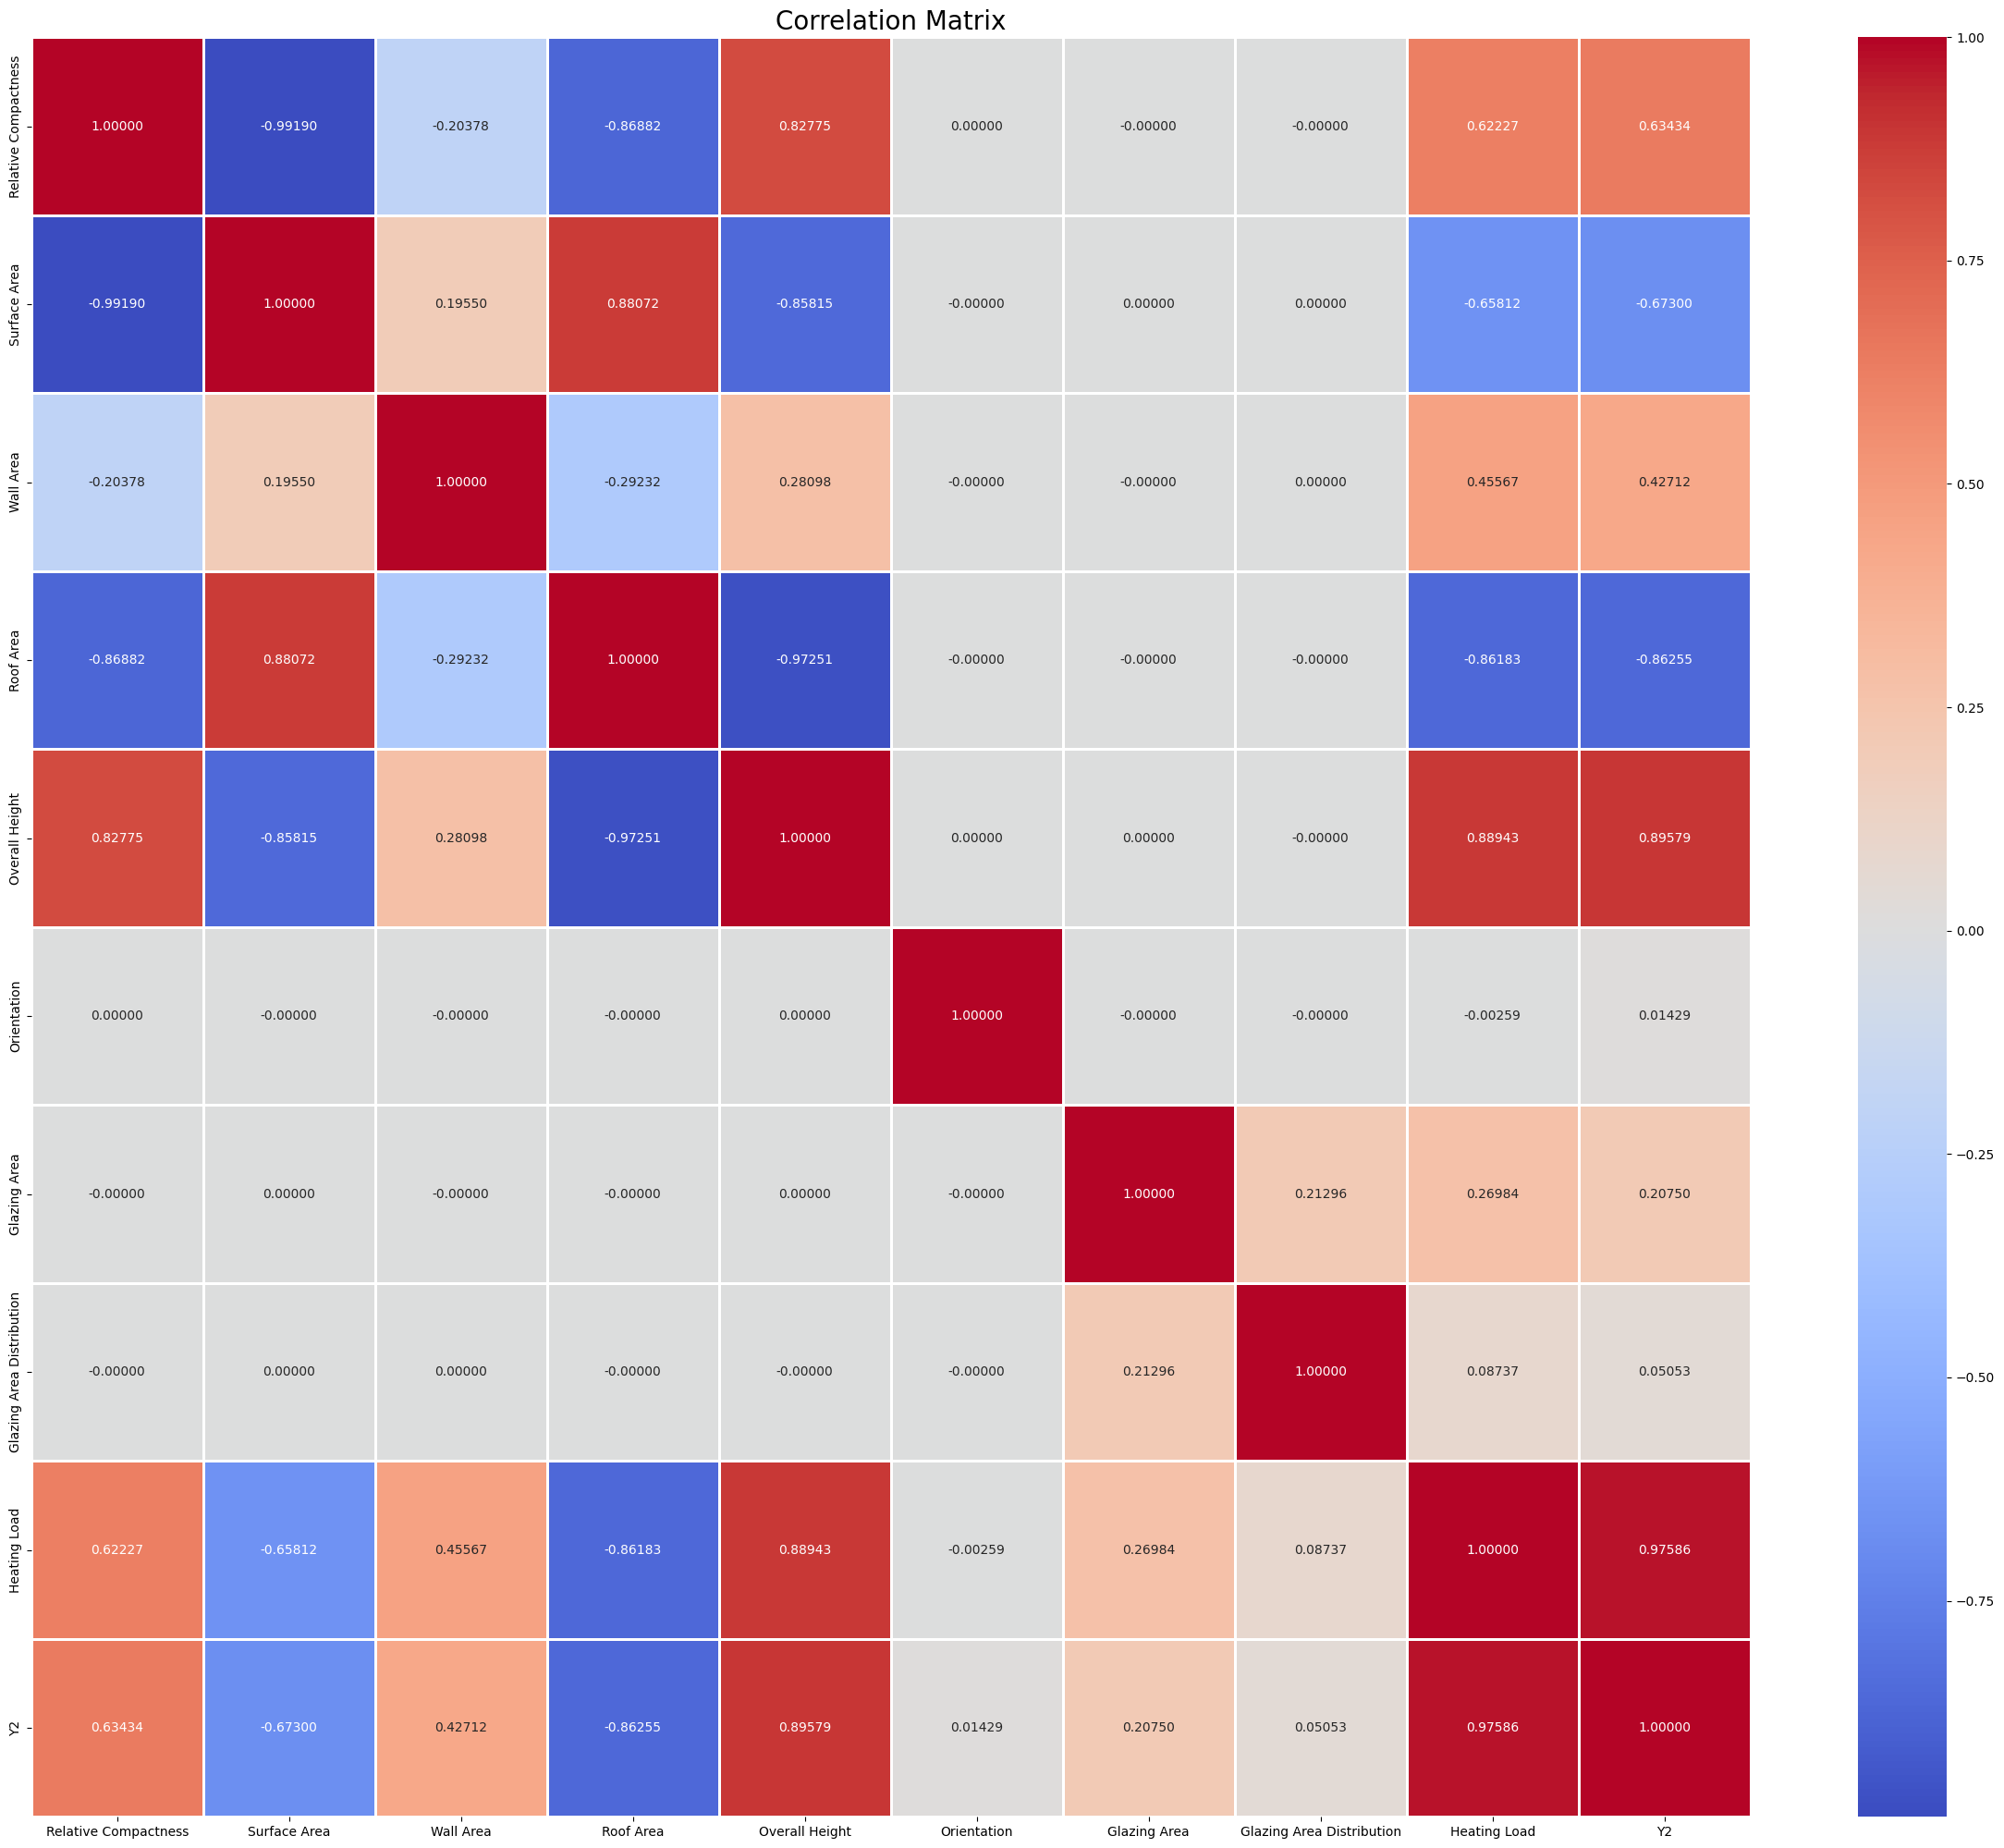

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(30,25))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=1)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

### 4.) Scatter Plot

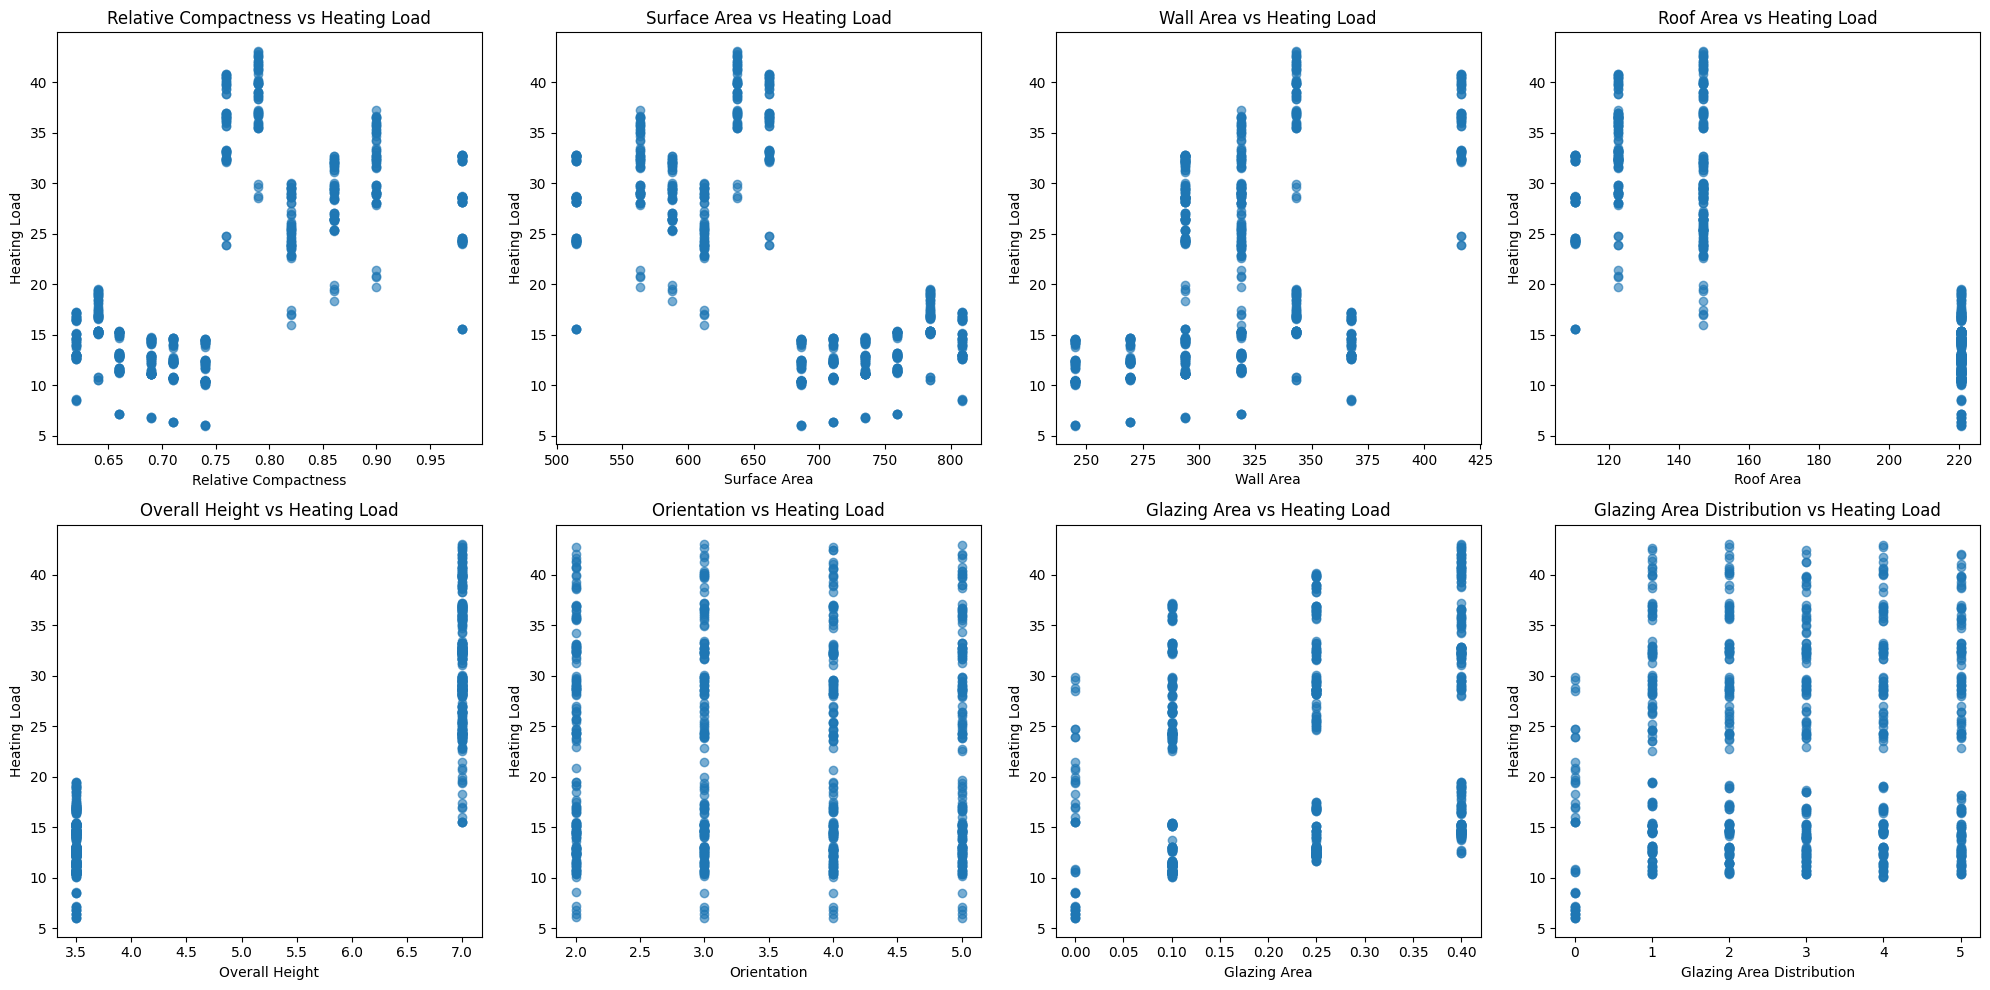

In [241]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=False)

target_col = df.columns[8]
col_index = 0

for i in range(2):
    for j in range(4):
        x_col = df.columns[col_index]
        axs[i, j].scatter(df[x_col], df[target_col], alpha=0.6)
        axs[i, j].set_title(f"{x_col} vs {target_col}")
        axs[i, j].set_xlabel(x_col)
        axs[i, j].set_ylabel(target_col)

        col_index += 1

plt.tight_layout()
plt.show()

### PCA

In [242]:
from sklearn.decomposition import PCA


In [243]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]

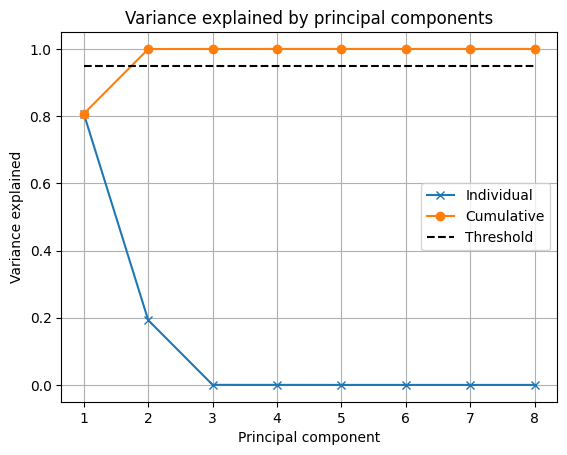

In [244]:
pca = PCA()

pca.fit(X)

V = pca.components_.T

rho = pca.explained_variance_ratio_

threshold = 0.95

plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

In [245]:
print(pca.explained_variance_ratio_)

[8.07032434e-01 1.92639516e-01 2.05504811e-04 1.06893310e-04
 1.41960454e-05 1.44648296e-06 9.05142690e-09 0.00000000e+00]


In [246]:
from sklearn.preprocessing import StandardScaler

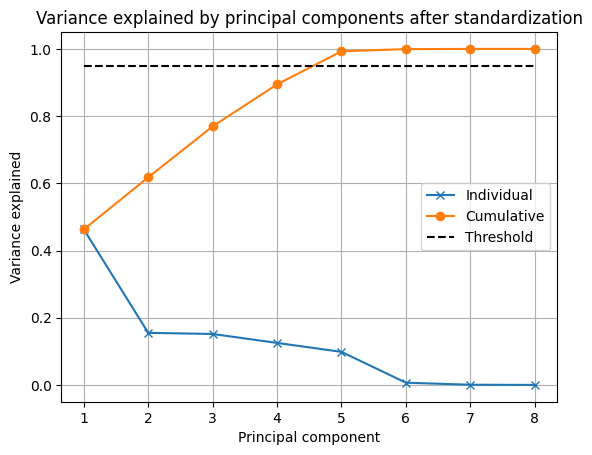

In [247]:
scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

pca.fit(X_standardized)

V = pca.components_.T

rho = pca.explained_variance_ratio_

threshold = 0.95

plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components after standardization")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

In [248]:
print(pca.explained_variance_ratio_)

[0.46286741 0.15498141 0.15162053 0.125      0.09837947 0.00659424
 0.00055694 0.        ]


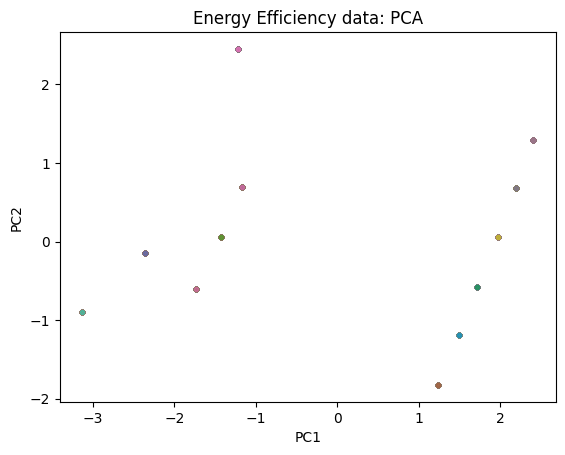

In [249]:
PC_idxs = [0, 1]  # Indices of the principal components to plot
unique_classes = np.unique(y) # Get unique classes from the target variable

# Project X to the subspace
B = pca.transform(X_standardized)

# Plot PCA of the data
fig = plt.figure()
plt.title("Energy Efficiency data: PCA")
# Plot the data projected onto the principal components, colored by their fluid type
for fluid_type in unique_classes:
    # Construct a mask for the current fluid type
    mask = (y == fluid_type)
    # Plot the data for the current fluid type
    plt.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5)

# Set axis labels
plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.show()

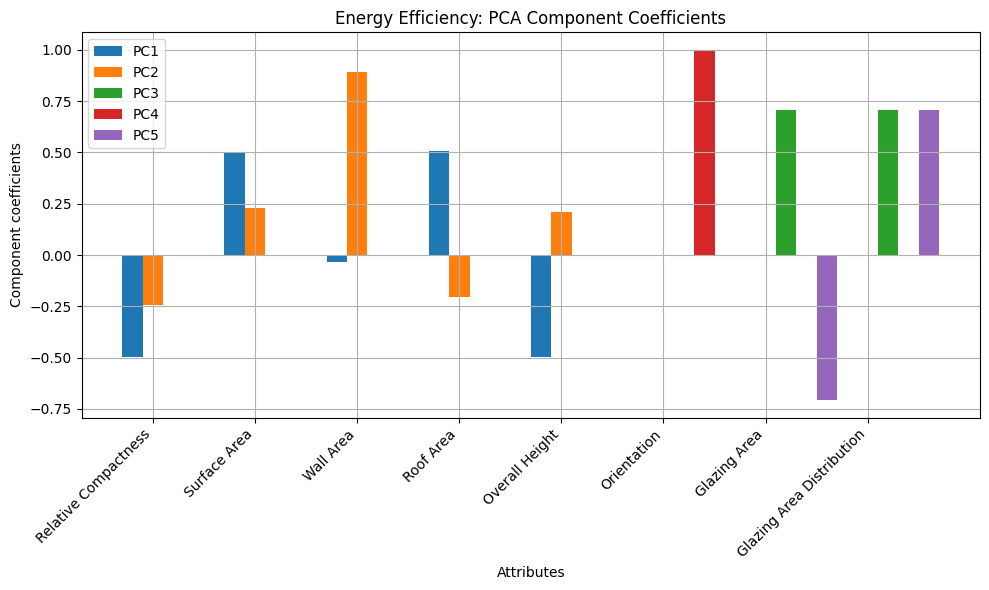

In [256]:
bw = 0.2
r = np.arange(1, X_standardized.shape[1] + 1)
fig = plt.figure(figsize=(10, 6))
plt.title("Energy Efficiency: PCA Component Coefficients")

for i, pc in enumerate(V[:, :5].T):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")

plt.xticks(r + bw, X.columns, rotation=45, ha="right")

plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()

plt.tight_layout() 

plt.show()